In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# isVirus =1=True Coronavirüs
# İsVirus =0=False Sağlıklı
data = pd.read_csv("dataset.csv")
data.replace({False: 0, True: 1}, inplace=True)#False değerleri 0 True değerleri 1 ile doldurma
data.apply(lambda x: x.fillna(x.mean(),inplace=True)) #NaN değerleri median ile doldurma     
data





,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,0
1,1.519003,1.238482,3.344450,0.783744,0
2,0.400640,1.916748,3.291096,-0.918519,0
3,-1.616474,0.209703,1.461544,-0.291837,0
4,1.480515,5.299829,2.640670,1.867559,1
...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,0
1995,0.814404,3.562990,2.621096,2.499590,0
1996,4.059027,1.977436,2.144760,4.257220,0
1997,3.457310,3.962342,3.770837,3.243168,0


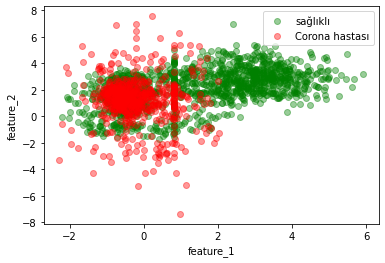

In [31]:
hastalikli_insanlar = data[data.isVirus == 1]
saglikli_insanlar = data[data.isVirus == 0]


# Şimdilik sadece feature_1 ve feature_2 ye bakarak örnek bir çizim yapalım:
# Programımızın sonunda makine öğrenme modelimiz sadece glikoza değil tüm diğer verilere bakarak bir tahmin yapacaktır..
plt.scatter(saglikli_insanlar.feature_1, saglikli_insanlar.feature_2, color="green", label="sağlıklı", alpha = 0.4)
plt.scatter(hastalikli_insanlar.feature_1, hastalikli_insanlar.feature_2, color="red", label="Corona hastası", alpha = 0.4)
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.legend()
plt.show()


In [32]:
# x ve y eksenlerini belirleyelim
y = data.isVirus.values
x_ham_veri = data.drop(["isVirus"],axis=1)   
# "isVirus sütununu(dependent variable) çıkarıp sadece independent variables bırakıyoruz
# Çüknü KNN algoritması x değerleri içerisinde gruplandırma yapacak..


# normalization yapıyoruz - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir!
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

# önce
print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head())


# sonra 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())


Normalization öncesi ham veriler:

   feature_1  feature_2  feature_3  feature_4
0  -0.233467   0.308799   2.484015   1.732721
1   1.519003   1.238482   3.344450   0.783744
2   0.400640   1.916748   3.291096  -0.918519
3  -1.616474   0.209703   1.461544  -0.291837
4   1.480515   5.299829   2.640670   1.867559



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   feature_1  feature_2  feature_3  feature_4
0   0.249803   0.514453   0.526202   0.540646
1   0.463139   0.576794   0.583900   0.432387
2   0.326996   0.622276   0.580322   0.238195
3   0.081443   0.507808   0.457639   0.309686
4   0.458454   0.849134   0.536707   0.556028


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)
# knn modelimizi oluşturuyoruz.
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K=3 için Test verilerimizin doğrulama testi sonucu ", knn.score(x_test, y_test))

K=3 için Test verilerimizin doğrulama testi sonucu  0.86


In [34]:
# k kaç olmalı ?
# en iyi k değerini belirleyelim..
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, "  ", "Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1

1    Doğruluk oranı: % 83.0
2    Doğruluk oranı: % 85.0
3    Doğruluk oranı: % 86.0
4    Doğruluk oranı: % 84.5
5    Doğruluk oranı: % 85.5
6    Doğruluk oranı: % 86.0
7    Doğruluk oranı: % 87.0
8    Doğruluk oranı: % 87.5
9    Doğruluk oranı: % 86.0
10    Doğruluk oranı: % 88.5
